In [57]:
import pandas as pd

In [58]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [59]:
# Concateno todos los tuits para hacer un word cloud.
allWords = ''
for text in train.text:
    allWords += ' ' + text

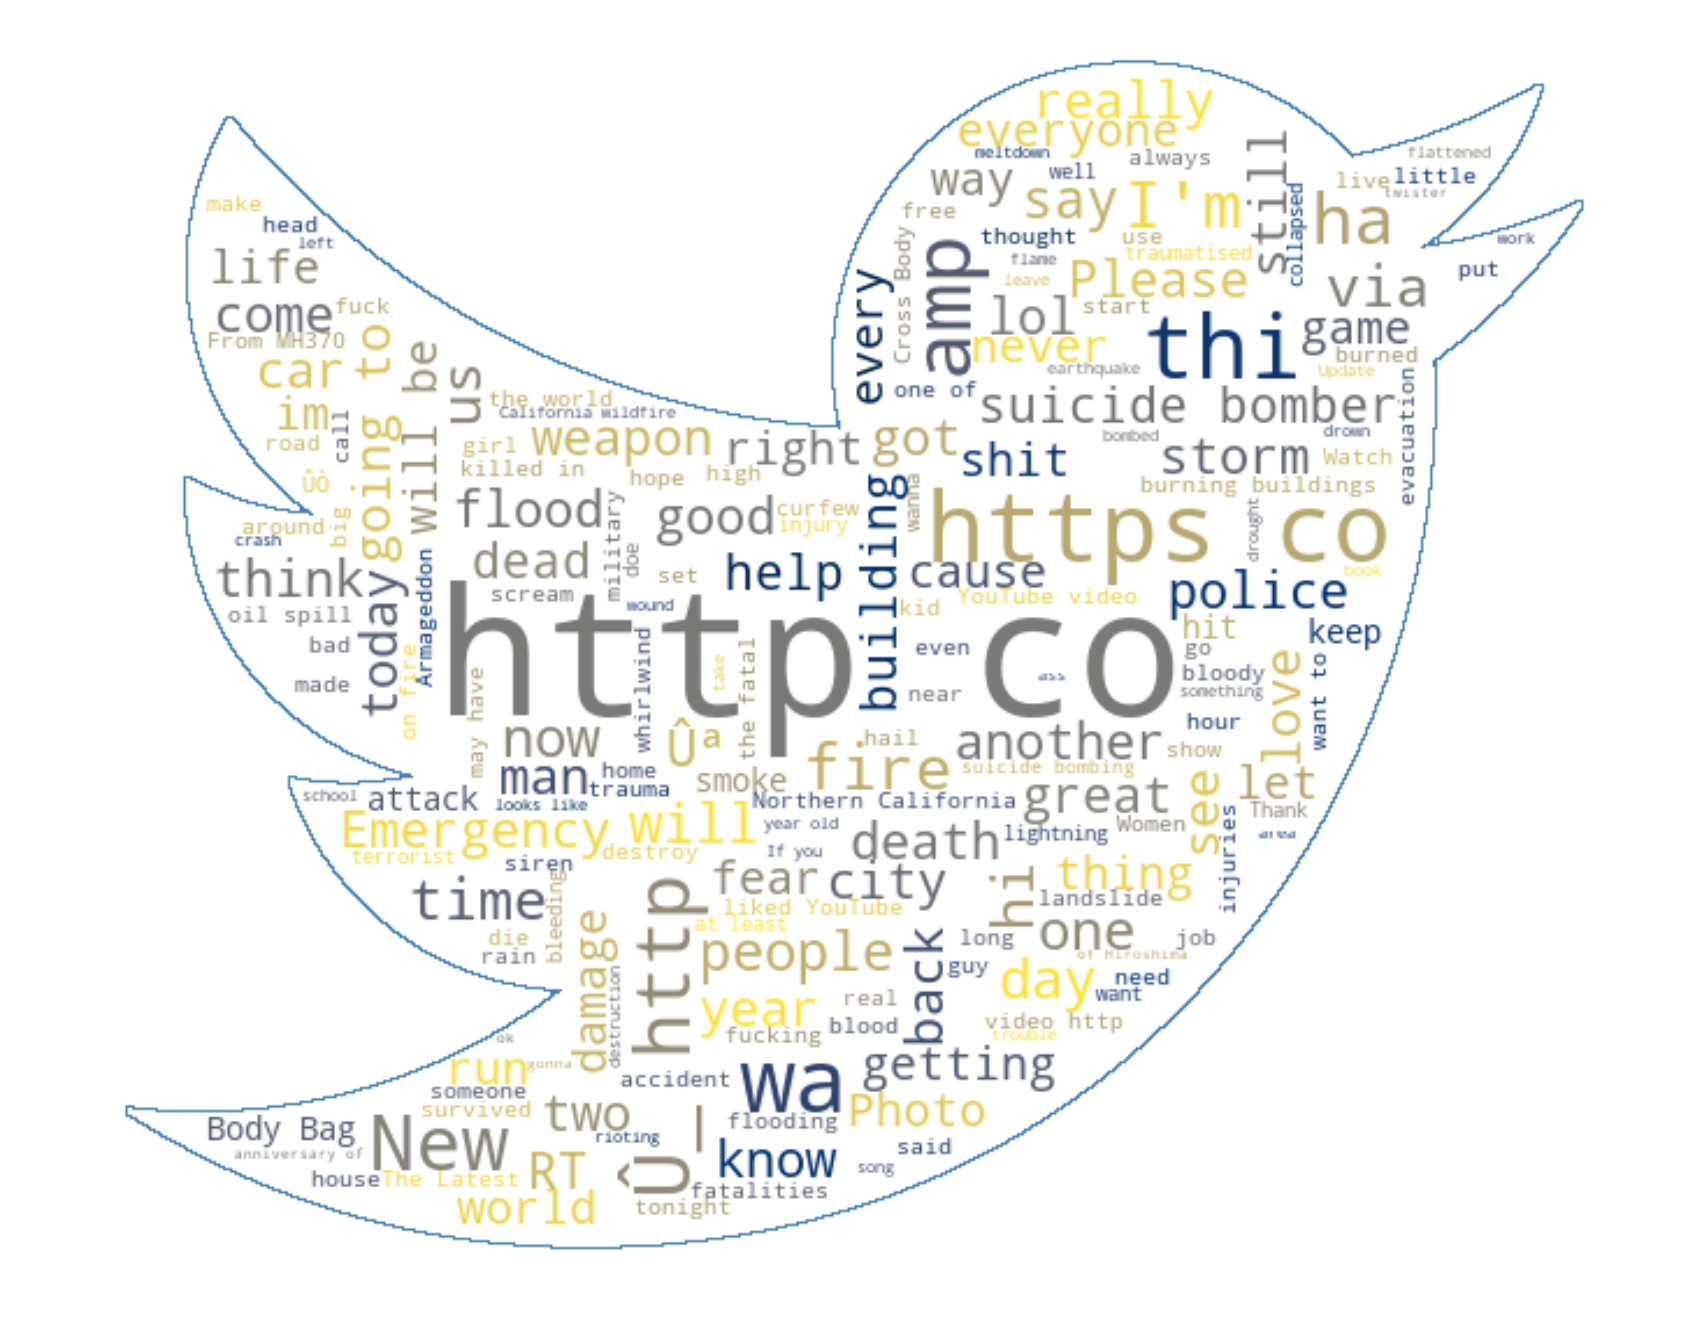

In [124]:
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "twitter.png")))

stopwords = list(STOPWORDS)

wc = WordCloud(background_color="white", stopwords=stopwords, colormap='cividis', mask=twitter_mask, contour_width=1, contour_color='steelblue')

# generate word cloud
wc.generate(allWords)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.rcParams["figure.figsize"] = [0, 0]
plt.rcParams["figure.figsize"] = [30, 30]

En el siguiente wordcloud se puede observar que las palabras más frecuentes tienen relación con lo que es compartir links, como por ejemplo 'http', 'co', 'via', entre otras.
También se ven palabras como 'New', 'Emergency', 'fire', 'people', Please.

In [110]:
falsos = train[train['target'] == 0]
falsos.head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [189]:
listAllWordsFalsos = []
for text in falsos.text:
    listAllWordsFalsos += text.lower().split(' ')

import re
allWordsFalsos = ''
for word in listAllWordsFalsos:
    containsStopword = False
    for stopword in ['http', 'co', 'amp', 'will', 'ha', 'wa', 'û']:
        regex = re.compile('\\b'+stopword+'\\b')
        if re.search(regex, word) != None:
            containsStopword = True
            break
    if containsStopword == False:
        allWordsFalsos += ' ' + word

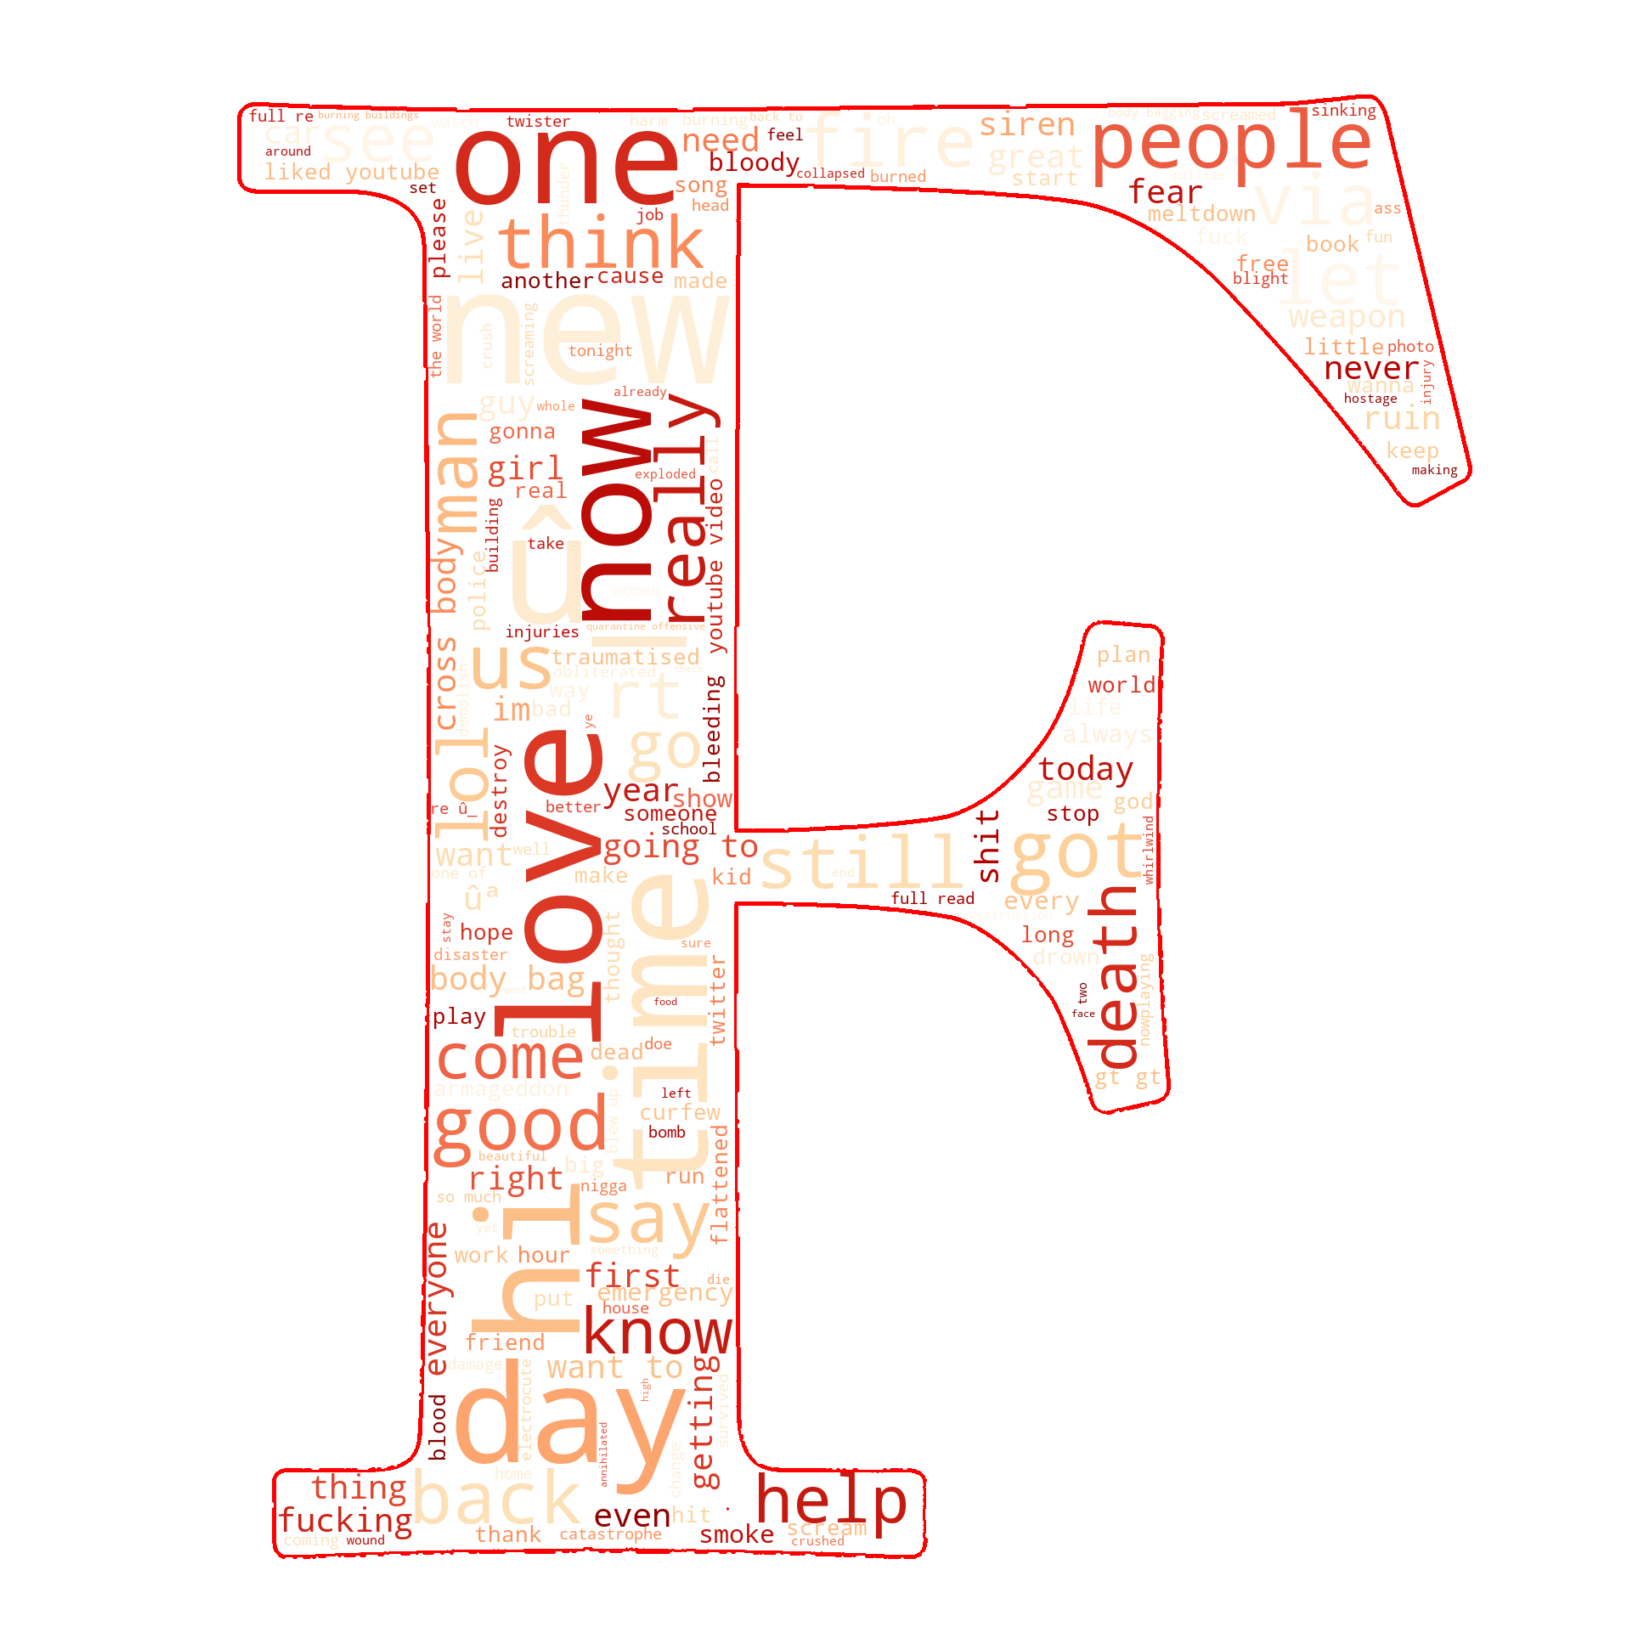

In [182]:
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "falsos.png")))

wc1 = WordCloud(background_color="white", stopwords=STOPWORDS, colormap='OrRd', mask=twitter_mask, contour_width=2, contour_color='red')

# generate word cloud
wc1.generate(allWordsFalsos)

# show
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.rcParams["figure.figsize"] = [0, 0]
plt.rcParams["figure.figsize"] = [30, 30]

In [115]:
verdaderos = train[train['target'] == 1]
verdaderos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [190]:
listAllWordsVerdaderos = []
for text in verdaderos.text:
    listAllWordsVerdaderos += text.lower().split(' ')

import re
allWordsVerdaderos = ''
for word in listAllWordsVerdaderos:
    containsStopword = False
    for stopword in ['http', 'co', 'https', 'amp', 'will', 'ha', 'wa', 'û_']:
        regex = re.compile('\\b'+stopword+'\\b')
        if re.search(regex, word) != None:
            containsStopword = True
            break
    if containsStopword == False:
        allWordsVerdaderos += ' ' + word

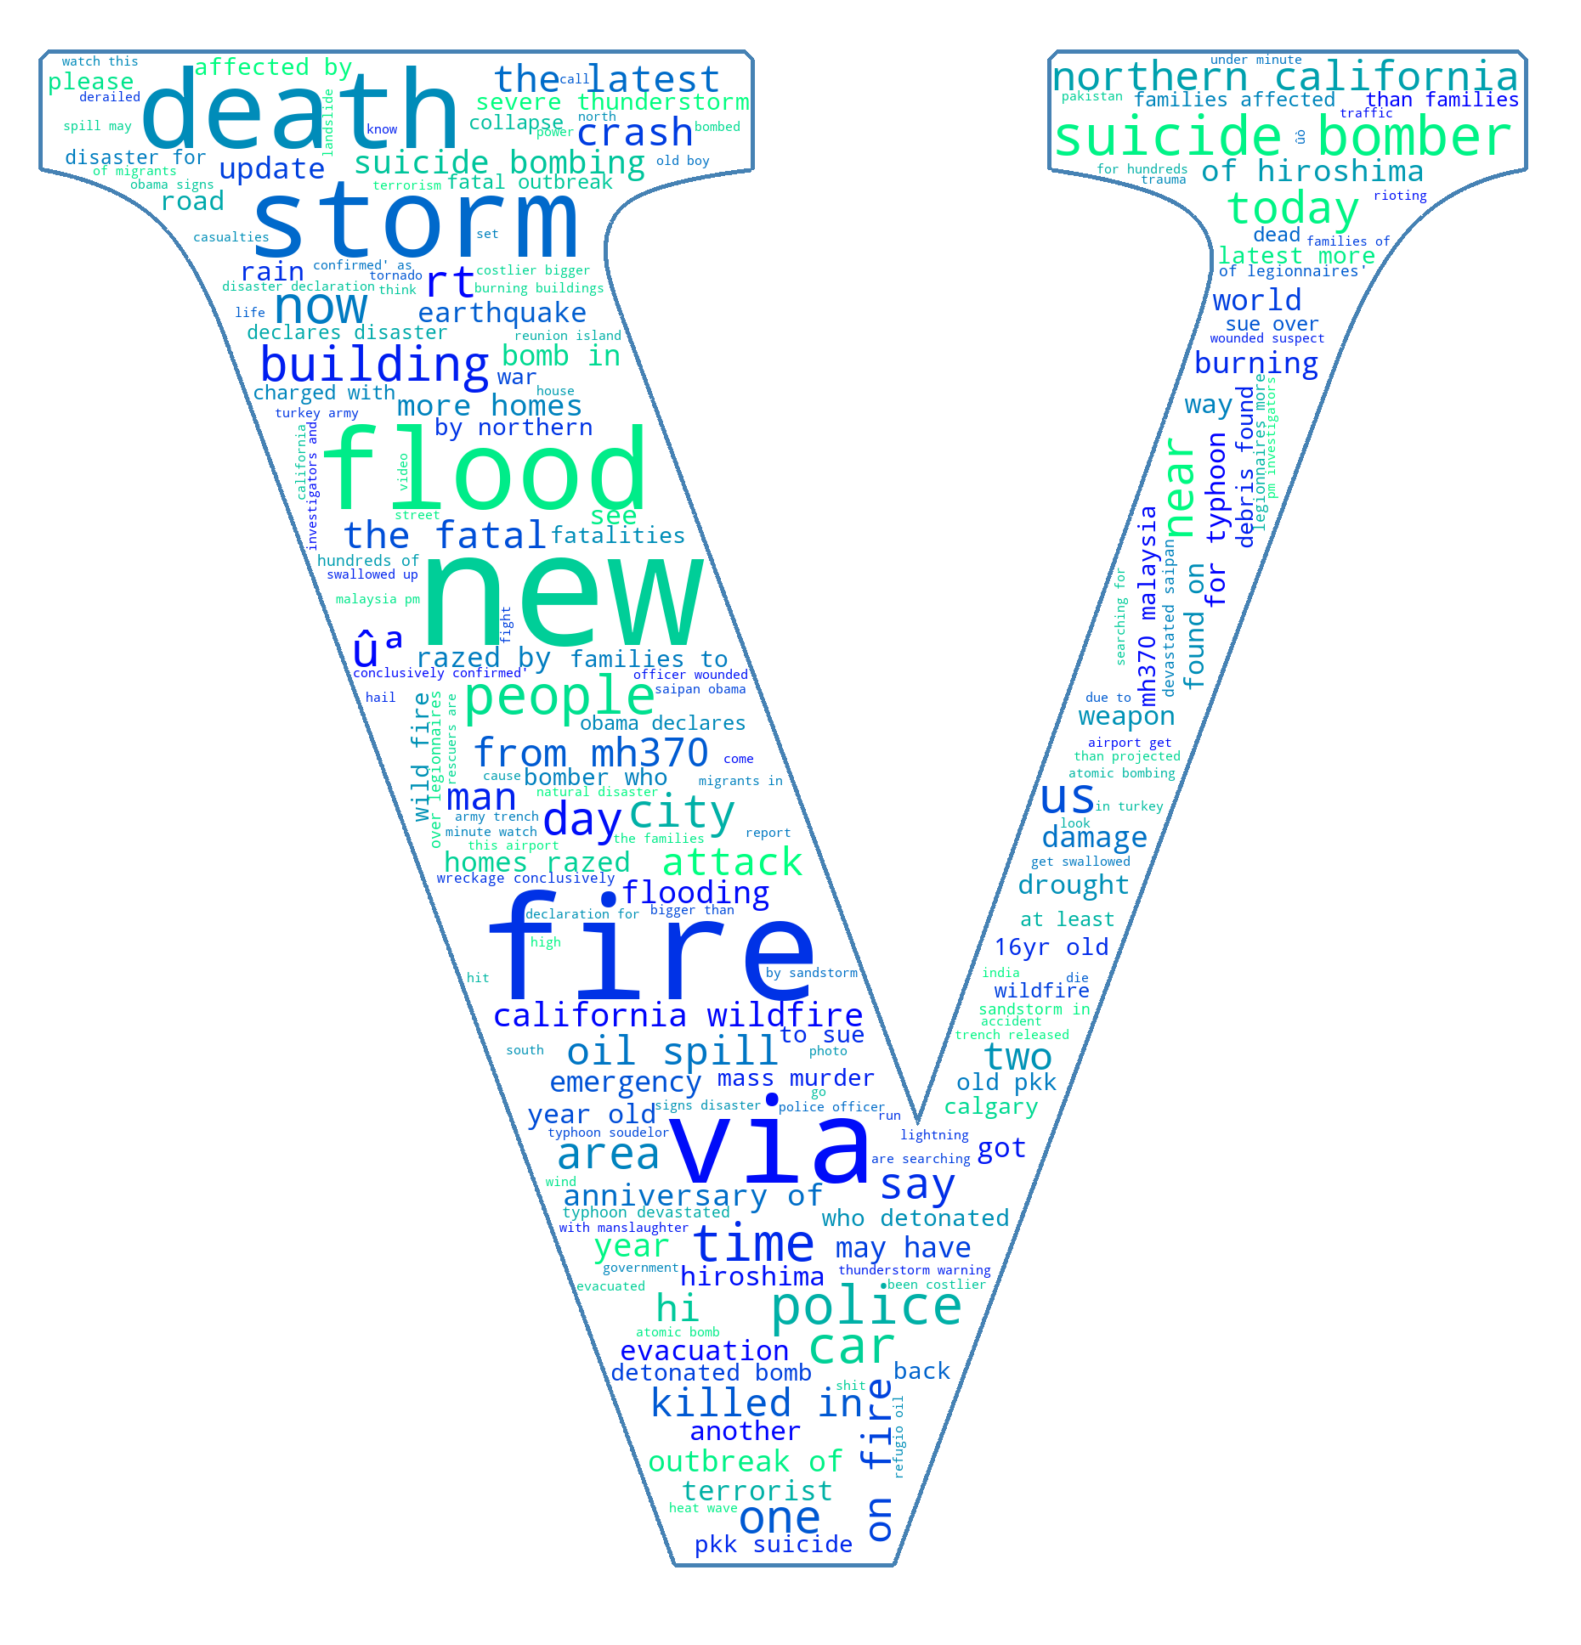

In [191]:
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "verdaderos.png")))

wc2 = WordCloud(background_color="white", stopwords=STOPWORDS, colormap='winter', mask=twitter_mask, contour_width=2, contour_color='steelblue')

# generate word cloud
wc2.generate(allWordsVerdaderos)

# show
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.rcParams["figure.figsize"] = [0, 0]
plt.rcParams["figure.figsize"] = [30, 30]